In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval
import pickle
import pprint
pp = pprint.PrettyPrinter(depth=6)
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 150)

import os
thedir = 'rtp-torrent'
dirs = [name for name in os.listdir(thedir) if os.path.isdir(os.path.join(thedir, name))]
projects = [dirname.replace("@", "/") for dirname in dirs if "@" in dirname]
projects

In [4]:
folder = "../../../tmp"

In [5]:
for chunk in  pd.read_csv(f"{folder}/travistorrent_8_2_2017.csv", chunksize=10):
    cols = print(chunk.columns)
    break

Index(['tr_build_id', 'gh_project_name', 'gh_is_pr', 'gh_pr_created_at',
       'gh_pull_req_num', 'gh_lang', 'git_merged_with', 'git_branch',
       'gh_num_commits_in_push', 'gh_commits_in_push',
       'git_prev_commit_resolution_status', 'git_prev_built_commit',
       'tr_prev_build', 'gh_first_commit_created_at', 'gh_team_size',
       'git_all_built_commits', 'git_num_all_built_commits',
       'git_trigger_commit', 'tr_virtual_merged_into', 'tr_original_commit',
       'gh_num_issue_comments', 'gh_num_commit_comments', 'gh_num_pr_comments',
       'git_diff_src_churn', 'git_diff_test_churn', 'gh_diff_files_added',
       'gh_diff_files_deleted', 'gh_diff_files_modified',
       'gh_diff_tests_added', 'gh_diff_tests_deleted', 'gh_diff_src_files',
       'gh_diff_doc_files', 'gh_diff_other_files',
       'gh_num_commits_on_files_touched', 'gh_sloc', 'gh_test_lines_per_kloc',
       'gh_test_cases_per_kloc', 'gh_asserts_cases_per_kloc',
       'gh_by_core_team_member', 'gh_descrip

In [6]:
df = pd.read_csv(f"{folder}/travis_projects.csv", index_col=0)
df

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,git_prev_commit_resolution_status,git_prev_built_commit,tr_prev_build,gh_first_commit_created_at,gh_team_size,git_all_built_commits,git_num_all_built_commits,git_trigger_commit,tr_virtual_merged_into,tr_original_commit,gh_num_issue_comments,gh_num_commit_comments,gh_num_pr_comments,git_diff_src_churn,git_diff_test_churn,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified,gh_diff_tests_added,gh_diff_tests_deleted,gh_diff_src_files,gh_diff_doc_files,gh_diff_other_files,gh_num_commits_on_files_touched,gh_sloc,gh_test_lines_per_kloc,gh_test_cases_per_kloc,gh_asserts_cases_per_kloc,gh_by_core_team_member,gh_description_complexity,gh_pushed_at,gh_build_started_at,tr_status,tr_duration,tr_jobs,tr_build_number,tr_job_id,tr_log_lan,tr_log_status,tr_log_setup_time,tr_log_analyzer,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration,build_successful
146754,1053608,adamfisk/LittleProxy,False,NaN,NaN,java,NaN,master,1.0,e8f1b0f7334229a4cbf91131e3757f10bb43ce24,merge_found,NaN,NaN,2012-04-10 01:34:54,7,e8f1b0f7334229a4cbf91131e3757f10bb43ce24#eb60e...,2,e8f1b0f7334229a4cbf91131e3757f10bb43ce24,NaN,e8f1b0f7334229a4cbf91131e3757f10bb43ce24,NaN,0,NaN,1,781,4,3,6,0,0,10,0,3,73,2870,208.710801,5.923345,11.846690,True,NaN,2012-04-10 01:35:10,2012-04-10 01:37:30,failed,2148.0,[1053609],1,1053609,java,unknown,NaN,java-maven,junit,True,False,0.0,0.0,NaN,0.0,NaN,0.03,NaN,False
151226,1104002,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,master,1.0,9bace34b804cb936aefd11efe4e28ef69041d125,merge_found,NaN,NaN,2012-03-01 16:45:57,8,9bace34b804cb936aefd11efe4e28ef69041d125#80030...,5,9bace34b804cb936aefd11efe4e28ef69041d125,NaN,9bace34b804cb936aefd11efe4e28ef69041d125,NaN,0,NaN,3968,1313,29,7,84,0,0,115,0,7,375,3652,473.986857,41.621030,55.859803,False,NaN,2012-03-01 16:46:06,2012-04-16 11:37:17,failed,22.0,[1104003],1,1104003,ruby,unknown,NaN,ruby,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
151227,1104009,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,develop,1.0,e67571d90c1a7811aa97e084d4bed790fcd3d564,merge_found,NaN,NaN,2012-04-16 11:39:14,8,e67571d90c1a7811aa97e084d4bed790fcd3d564#7e772...,5,e67571d90c1a7811aa97e084d4bed790fcd3d564,NaN,e67571d90c1a7811aa97e084d4bed790fcd3d564,NaN,1,NaN,963,0,13,1,15,0,0,27,0,2,187,4225,421.775148,36.686391,49.704142,False,NaN,2012-04-16 11:39:23,2012-04-16 11:42:01,failed,147.0,[1104010],2,1104010,unknown,unknown,NaN,plain,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
151233,1104095,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,develop,10.0,e67571d90c1a7811aa97e084d4bed790fcd3d564#ef267...,build_found,e67571d90c1a7811aa97e084d4bed790fcd3d564,1104009.0,2012-04-11 21:34:01,8,ef2675615047945cbb9ec6e473b76f4b8e9fcd80,1,ef2675615047945cbb9ec6e473b76f4b8e9fcd80,NaN,ef2675615047945cbb9ec6e473b76f4b8e9fcd80,NaN,0,NaN,2,0,1,0,1,0,0,1,0,1,1,4225,421.775148,36.686391,49.704142,False,NaN,2012-04-16 12:01:53,2012-04-16 11:52:28,failed,21.0,[1104096],3,1104096,unknown,unknown,NaN,plain,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
151234,1104114,Graylog2/graylog2-server,False,NaN,NaN,java,NaN,develop,1.0,5bb2792d334e8b4e7770a7de7fc0babadf5841d9,build_found,ef2675615047945cbb9ec6e473b76f4b8e9fcd80,1104095.0,2012-04-16 11:52:13,8,5bb2792d334e8b4e7770a7de7fc0babadf5841d9,1,5bb2792d334e8b4e7770a7de7fc0babadf5841d9,NaN,5bb2792d334e8b4e7770a7de7fc0babadf5841d9,NaN,0,NaN,0,0,0,0,1,0,0,0,0,1,2,4225,421.775148,36.686391,49.704142,False,NaN,2012-04-16 11:52:21,2012-04-16 11:54:59,passed,200.0,[1104115],4,1104115,java,unknown,NaN,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [7]:
df.columns

Index(['tr_build_id', 'gh_project_name', 'gh_is_pr', 'gh_pr_created_at',
       'gh_pull_req_num', 'gh_lang', 'git_merged_with', 'git_branch',
       'gh_num_commits_in_push', 'gh_commits_in_push',
       'git_prev_commit_resolution_status', 'git_prev_built_commit',
       'tr_prev_build', 'gh_first_commit_created_at', 'gh_team_size',
       'git_all_built_commits', 'git_num_all_built_commits',
       'git_trigger_commit', 'tr_virtual_merged_into', 'tr_original_commit',
       'gh_num_issue_comments', 'gh_num_commit_comments', 'gh_num_pr_comments',
       'git_diff_src_churn', 'git_diff_test_churn', 'gh_diff_files_added',
       'gh_diff_files_deleted', 'gh_diff_files_modified',
       'gh_diff_tests_added', 'gh_diff_tests_deleted', 'gh_diff_src_files',
       'gh_diff_doc_files', 'gh_diff_other_files',
       'gh_num_commits_on_files_touched', 'gh_sloc', 'gh_test_lines_per_kloc',
       'gh_test_cases_per_kloc', 'gh_asserts_cases_per_kloc',
       'gh_by_core_team_member', 'gh_descrip

#### Number of builds per project

Text(0.5, 1.0, 'Number of builds')

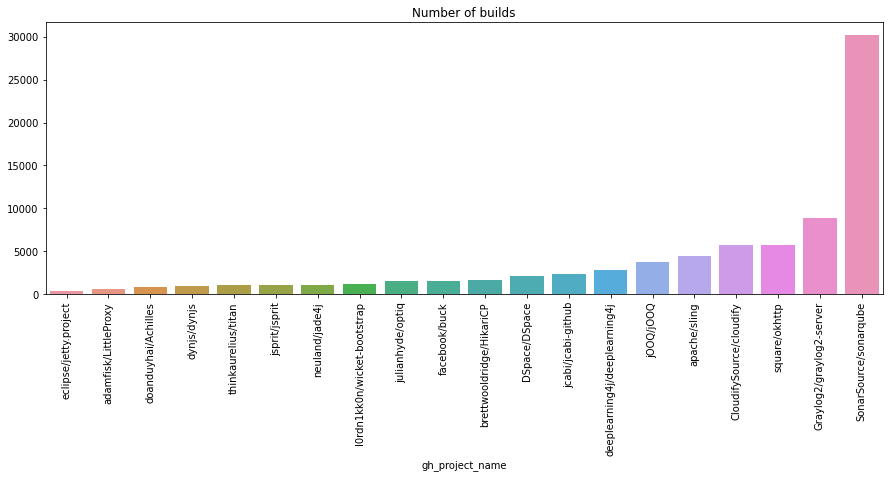

In [8]:
plt.figure(figsize=(15,5))

data=df.groupby("gh_project_name").count().tr_build_id
data=data.sort_values()

ax = sns.barplot(x=data.index,y=data.values)
ax.tick_params(axis='x', labelrotation= 90)
ax.set_title("Number of builds")

#### Number of builds with test results

Text(0.5, 1.0, 'Number of builds with test results')

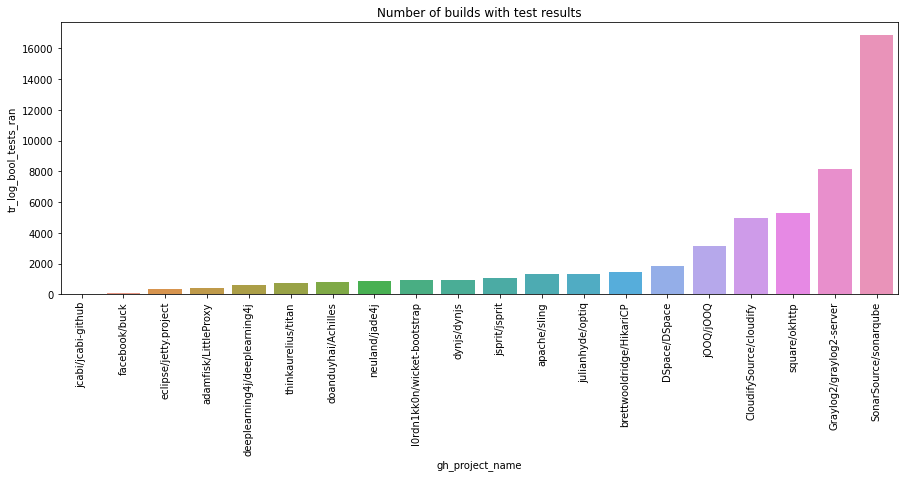

In [9]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="gh_project_name",y="tr_log_bool_tests_ran",
                 data=df.groupby(df.gh_project_name).sum().tr_log_bool_tests_ran.reset_index().sort_values(by="tr_log_bool_tests_ran"))
ax.tick_params(axis='x', labelrotation= 90)
ax.set_title("Number of builds with test results")

#### Percentage of builds with test results

Text(0.5, 1.0, 'Percentage of builds with test results')

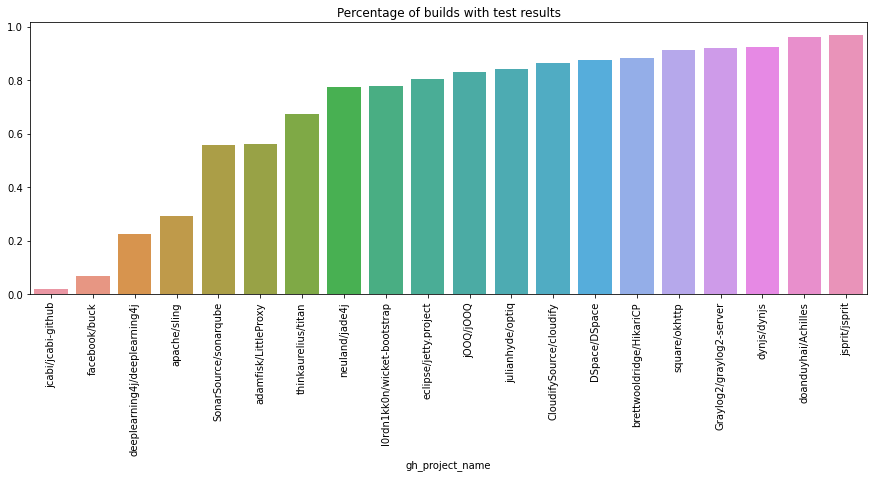

In [10]:
plt.figure(figsize=(15,5))

data=df.groupby("gh_project_name").sum().tr_log_bool_tests_ran/df.groupby("gh_project_name").tr_log_bool_tests_ran.count()
data=data.sort_values()

ax = sns.barplot(x=data.index,y=data.values)
ax.tick_params(axis='x', labelrotation= 90)
ax.set_title("Percentage of builds with test results")

## In depth analysis of a project

In [11]:
project='SonarSource/sonarqube'

In [12]:
project_df = df[df.gh_project_name == project]
project_df.sort_values(by="tr_build_id").head(10)

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,git_prev_commit_resolution_status,git_prev_built_commit,tr_prev_build,gh_first_commit_created_at,gh_team_size,git_all_built_commits,git_num_all_built_commits,git_trigger_commit,tr_virtual_merged_into,tr_original_commit,gh_num_issue_comments,gh_num_commit_comments,gh_num_pr_comments,git_diff_src_churn,git_diff_test_churn,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified,gh_diff_tests_added,gh_diff_tests_deleted,gh_diff_src_files,gh_diff_doc_files,gh_diff_other_files,gh_num_commits_on_files_touched,gh_sloc,gh_test_lines_per_kloc,gh_test_cases_per_kloc,gh_asserts_cases_per_kloc,gh_by_core_team_member,gh_description_complexity,gh_pushed_at,gh_build_started_at,tr_status,tr_duration,tr_jobs,tr_build_number,tr_job_id,tr_log_lan,tr_log_status,tr_log_setup_time,tr_log_analyzer,tr_log_frameworks,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration,build_successful
2310262,54731125,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,a056b278e321bac091ea3d5fe1f21ad75854e273,merge_found,NaN,NaN,2015-03-17 15:02:55,21,a056b278e321bac091ea3d5fe1f21ad75854e273#15ee5...,14,a056b278e321bac091ea3d5fe1f21ad75854e273,NaN,a056b278e321bac091ea3d5fe1f21ad75854e273,NaN,0,NaN,4112,870,41,5,84,0,0,81,4,37,1367,139469,749.829711,44.834336,120.141393,True,NaN,2015-03-17 15:03:10,2015-03-17 15:04:32,failed,255.0,"[54731126, 54731127]",1,54731127,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.00,False
2310263,54731125,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,a056b278e321bac091ea3d5fe1f21ad75854e273,merge_found,NaN,NaN,2015-03-17 15:02:55,21,a056b278e321bac091ea3d5fe1f21ad75854e273#15ee5...,14,a056b278e321bac091ea3d5fe1f21ad75854e273,NaN,a056b278e321bac091ea3d5fe1f21ad75854e273,NaN,0,NaN,4112,870,41,5,84,0,0,81,4,37,1367,139469,749.829711,44.834336,120.141393,True,NaN,2015-03-17 15:03:10,2015-03-17 15:04:32,failed,255.0,"[54731126, 54731127]",1,54731126,java,broken,4.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.00,False
2310282,54734500,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,build_found,a056b278e321bac091ea3d5fe1f21ad75854e273,54731125.0,2015-03-17 15:19:11,21,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,1,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,NaN,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,NaN,0,NaN,0,184,3,0,3,0,5,5,0,1,7,139469,750.654267,44.870186,120.277624,True,NaN,2015-03-17 15:25:59,2015-03-17 15:27:56,failed,254.0,"[54734501, 54734502]",2,54734502,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,False
2310283,54734500,SonarSource/sonarqube,False,NaN,NaN,java,NaN,master,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,build_found,a056b278e321bac091ea3d5fe1f21ad75854e273,54731125.0,2015-03-17 15:19:11,21,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,1,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,NaN,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,NaN,0,NaN,0,184,3,0,3,0,5,5,0,1,7,139469,750.654267,44.870186,120.277624,True,NaN,2015-03-17 15:25:59,2015-03-17 15:27:56,failed,254.0,"[54734501, 54734502]",2,54734501,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.00,False
2310327,54738299,SonarSource/sonarqube,False,NaN,NaN,java,NaN,latest-silver-master#476,1.0,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,build_found,a056b278e321bac091ea3d5fe1f21ad75854e273,54731125.0,2015-03-17 15:19:11,21,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,1,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,NaN,0a5224287f9dd6a3f0d3098d2f21bb4c69023f12,NaN,0,NaN,0,184,3,0,3,0,5,5,0,1,7,139469,750.654267,44.870186,120.277624,True,NaN,2015-03-17 15:25:59,2015-03-17 15:53:09,failed,272.0,"[54738300, 54738301]",3,54738300,java,broken,3.0,java-ant,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
project_df.shape

(30142, 62)

**Count lines containing the project name**

Make sure all lines for the project are correctly imported in pandas

In [14]:
num_rows = 0
for row in open(f"{folder}/travistorrent_8_2_2017.csv"):
    if(project in row):
        num_rows += 1
num_rows == len(project_df)

True

### Missing builds from TraviTorrent
TraviCI uses an incremental build_number. All the builds up to the highest build_number for the project should be present in the dataset

In [15]:
max_build_number = project_df.tr_build_number.max()
n_missing_builds = max_build_number - len(project_df.tr_build_number.unique())
n_missing_builds

8222

In [16]:
len(project_df.tr_build_number.unique())

4690

Let's plot the distribution of build_numbers to visualize if older builds are the ones more affected by this problem

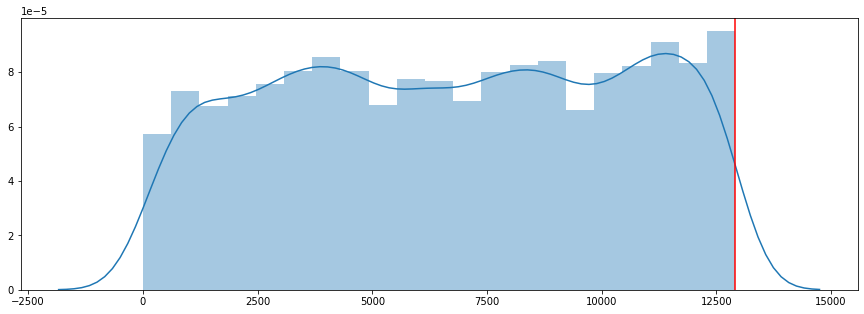

In [17]:
missing_build_numbers = []
build_numbers = project_df.tr_build_number.unique()
for i in range(0, project_df.tr_build_number.max()):
    if i not in build_numbers:
        missing_build_numbers.append(i)
sns.distplot(missing_build_numbers)
plt.axvline(max_build_number, 0, 10, color="r")

The problem seems to affect builds up until the very last build present in the dataset (the red line)

**Total number of builds for the project in TravisTorrent**

In [18]:
len(project_df.tr_build_id.unique())

4690

In [19]:
len(project_df.tr_build_id.unique()) + n_missing_builds == max_build_number

True

In [20]:
project_df[[col for col in project_df if col.startswith("tr_log")]].describe()

,tr_log_setup_time,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_testduration,tr_log_buildduration
count,29929.000000,16846.000000,16846.000000,15755.000000,16846.000000,16853.000000,22978.000000
mean,3.917839,133.656536,0.023448,142.937036,5.219518,279.699226,469.346592
std,4.571636,222.944923,0.460602,227.670216,9.492445,237.153014,320.560954
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,17.000000,0.000000,51.900000,133.000000
50%,4.000000,49.000000,0.000000,49.000000,0.000000,245.940000,452.000000
75%,4.000000,98.000000,0.000000,98.000000,4.000000,433.800000,737.000000
max,385.000000,5597.000000,21.000000,5598.000000,26.000000,1216.600000,2723.000000


plt.figure(figsize=(15,5))
plt.locator_params(axis='x', nbins=6)
ax = sns.lineplot(x="tr_build_id", y="tr_log_num_tests_run", data=project_df[["tr_build_id","tr_log_num_tests_run"]])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Import RTPTorrent dataset 
This dataset contains class specific test metrics for the project's builds

In [21]:
sonar_rtp = pd.read_csv(f"{folder}/rtp-torrent/SonarSource@sonarqube/SonarSource@sonarqube.csv")
sonar_rtp

,travisJobId,testName,index,duration,count,failures,errors,skipped
0,137788147,org.sonar.test.TestUtilsTest,0,0.298,4,0,0,0
1,137788147,org.sonar.test.JsonAssertTest,1,0.266,7,0,0,0
2,137788147,org.sonar.test.i18n.I18nMatchersTest,2,0.015,2,0,0,0
3,137788147,org.sonar.test.JsonComparisonTest,3,0.038,12,0,0,0
4,137788147,org.sonar.test.i18n.BundleSynchronizedMatcherTest,4,0.025,9,0,0,0
...,...,...,...,...,...,...,...,...
17134768,100821699,org.sonar.application.PropsBuilderTest,1421,0.198,7,0,0,0
17134769,100821699,org.sonar.application.CommandLineParserTest,1422,0.005,2,0,0,0
17134770,100821699,org.sonar.application.JdbcSettingsTest,1423,0.033,10,0,0,0
17134771,100821699,org.sonar.application.AppTest,1424,0.052,6,0,0,0


## TravisTorrent and RTPTorrent merging

**Are all the jobs' builds from RTPTorrent present in TravisTorrent dataset?**

In [24]:
rt_jobIds = sonar_rtp.travisJobId.unique()

In [25]:
travis_jobsIds = project_df.tr_job_id.unique()

In [26]:
len(set(rt_jobIds) - set(travis_jobsIds))

32321

In [47]:
(len(set(jobIds) - set(jobIds2)))/len(jobIds)

0.6063181195715385

More than 60% of the builds are missing from TravisTorrent

In [48]:
jobIds2[-1]

156501166

### TravisCI info for the project

In [49]:
from travispy import TravisPy

In [50]:
t = TravisPy()
repo = t.repo(project)

In [51]:
repo.last_build_number

'39429'

In [52]:
builds = t.builds(repository_id = repo.id, number = 1)
print(builds[0].started_at)

2015-03-17T15:04:32Z


* To this day, the project has over 39420 builds on TraviCI
* The first available build on TravisCI dates 17/3/2015

In [53]:
builds = t.builds(repository_id = repo.id, after_number = 10)
len(builds)

9

In [54]:
pp.pprint(builds[0].__slots__)

['repository_id',
 'commit_id',
 'number',
 'pull_request',
 'pull_request_title',
 'pull_request_number',
 'config',
 'started_at',
 'finished_at',
 'duration',
 'job_ids',
 'jobs',
 'commit']


In [55]:
builds[0].__slots__

['repository_id',
 'commit_id',
 'number',
 'pull_request',
 'pull_request_title',
 'pull_request_number',
 'config',
 'started_at',
 'finished_at',
 'duration',
 'job_ids',
 'jobs',
 'commit']

In [56]:
builds[0].job_ids

[54834267, 54834268]

## TravisCI builds for the project

In [115]:
import glob

In [116]:
v2_files = glob.glob("builds/v2/*.pkl")
v3_files = glob.glob("builds/v3/*.pkl")

In [117]:
with open(v2_files[0], 'rb') as f:
    builds2 = pickle.load(f)
v2_fields = builds2[0].keys()
v2_fields

dict_keys(['id', 'repository_id', 'commit_id', 'number', 'event_type', 'pull_request', 'pull_request_title', 'pull_request_number', 'config', 'state', 'started_at', 'finished_at', 'duration', 'job_ids'])

In [118]:
pp.pprint(builds2[0])

{'commit_id': 28112504,
 'config': {'.result': 'configured',
            'before_cache': ['find ~/.m2/repository -type d -name \\*-SNAPSHOT '
                             '-exec rm -rf {} \\;',
                             'find ~/.m2/repository -name maven-metadata-\\* '
                             '-exec rm {} \\;',
                             'find ~/.m2/repository -name '
                             'resolver-status.properties -exec rm {} \\;'],
            'cache': {'directories': ['$HOME/.m2/repository',
                                      '$HOME/.sonar',
                                      'server/sonar-web/node',
                                      'server/sonar-web/node_modules']},
            'dist': 'precise',
            'env': ['TARGET=CI',
                    'TARGET=IT IT_CATEGORY=Category1',
                    'TARGET=IT IT_CATEGORY=Category2',
                    'TARGET=IT IT_CATEGORY=Category3',
                    'TARGET=IT IT_CATEGORY=Category4',
       

In [119]:
with open(v3_files[0], 'rb') as f:
    builds3 = pickle.load(f)
v3_fields = builds3[0].keys()
v3_fields

dict_keys(['@type', '@href', '@representation', '@permissions', 'id', 'number', 'state', 'duration', 'event_type', 'previous_state', 'pull_request_title', 'pull_request_number', 'started_at', 'finished_at', 'private', 'repository', 'branch', 'tag', 'commit', 'jobs', 'stages', 'created_by', 'updated_at'])

In [120]:
pp.pprint(builds3[0])

{'@href': '/build/264330283',
 '@permissions': {'cancel': False, 'read': True, 'restart': False},
 '@representation': 'standard',
 '@type': 'build',
 'branch': {'@href': '/repo/234484/branch/janos%2Fvalidate-branch-config2',
            '@representation': 'minimal',
            '@type': 'branch',
            'name': 'janos/validate-branch-config2'},
 'commit': {'@representation': 'minimal',
            '@type': 'commit',
            'committed_at': '2017-08-14T11:50:13Z',
            'compare_url': 'https://github.com/SonarSource/sonarqube/compare/5857120b9aed...a23fba6ffb44',
            'id': 76913412,
            'message': 'Add incrementalMode param to '
                       'BrnachConfigurationValidator.validate',
            'ref': 'refs/heads/janos/validate-branch-config2',
            'sha': 'a23fba6ffb44e00b09009e8032bd42517479225e'},
 'created_by': {'@href': '/user/437829',
                '@representation': 'minimal',
                '@type': 'user',
                'id': 

In [121]:
common_fields = set(v3_fields).intersection(set(v2_fields))
common_fields

{'duration',
 'event_type',
 'finished_at',
 'id',
 'number',
 'pull_request_number',
 'pull_request_title',
 'started_at',
 'state'}

In [122]:
uncommon_fields = set(v3_fields).symmetric_difference(set(v2_fields))
uncommon_fields

{'@href',
 '@permissions',
 '@representation',
 '@type',
 'branch',
 'commit',
 'commit_id',
 'config',
 'created_by',
 'job_ids',
 'jobs',
 'previous_state',
 'private',
 'pull_request',
 'repository',
 'repository_id',
 'stages',
 'tag',
 'updated_at'}

## Builds retrival

In [123]:
builds_tuple = []

#### Version 2 retrieval

In [124]:
for v2_file in v2_files:
    with open(v2_file, 'rb') as f:
        builds2 = pickle.load(f)
        for build in builds2:
            build_values = []
            for field in common_fields:
                build_values.append(build[field])
            builds_tuple.append(tuple(build_values))

#### Version 3 retrieval

In [125]:
for v3_file in v3_files:
    with open(v3_file, 'rb') as f:
        builds3 = pickle.load(f)
        for build in builds3:
            build_values = []
            for field in common_fields:
                build_values.append(build[field])
            builds_tuple.append(tuple(build_values))

In [126]:
buildsDf = pd.DataFrame(builds_tuple, columns = common_fields)
buildsDf

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,6995,NaN,99118995,push,2015-12-28T16:34:08Z,None,2015-12-28T16:18:41Z,5361.0,failed
1,6994,NaN,99100662,push,2015-12-28T14:36:03Z,None,2015-12-28T14:18:30Z,5953.0,passed
2,6993,NaN,99093472,push,2015-12-28T13:27:51Z,None,2015-12-28T13:11:39Z,5166.0,passed
3,6992,NaN,99086186,push,2015-12-28T12:18:41Z,None,2015-12-28T12:10:56Z,5243.0,passed
4,6991,NaN,99078711,push,2015-12-28T10:56:34Z,None,2015-12-28T10:41:16Z,5045.0,passed
...,...,...,...,...,...,...,...,...,...
39378,36432,NaN,338500570,push,2018-02-07T13:38:25Z,None,2018-02-07T13:36:19Z,191.0,passed
39379,36431,NaN,338500019,push,2018-02-07T13:45:47Z,None,2018-02-07T13:35:06Z,859.0,failed
39380,36430,NaN,338499772,push,2018-02-07T13:57:02Z,None,2018-02-07T13:34:31Z,1543.0,passed
39381,36429,3028.0,338498110,pull_request,2018-02-07T13:48:27Z,SONAR-10364 upgrade protobuf to 3.2.0,2018-02-07T13:29:37Z,1331.0,passed


In [127]:
buildsDf["number"] = pd.to_numeric(buildsDf.number)

**Build numbers with multiple build_ids**

In [128]:
(buildsDf.groupby("number").count().id > 1).sum()

87

**Number of missing build numbers**

In [129]:
buildsDf.number.max() - buildsDf.number.min() - len(buildsDf.number.unique()) > 0

True

**Numbers of the missing builds**

In [130]:
t = buildsDf.number.unique()
missing_numbers = []
for i in range(1, buildsDf.number.max()):
    if i in t:
        continue
    missing_numbers.append(i)

In [131]:
len(missing_numbers)

131

In [132]:
import travis2
import travis

bs=[]
for number in missing_numbers:
    bs.append(travis2.get_builds({"repository_id": "234484", "number":  number})["builds"][0])

In [133]:
len(bs) == len(missing_numbers)

True

with open("builds/all_missing_builds.pkl", "wb") as f:
    pickle.dump(bs, f)

In [134]:
with open("builds/all_missing_builds.pkl", "rb") as f:
    bs = pickle.load(f)

In [135]:
missing_builds_tuple = []
for build in bs:
    missing_build_values = []
    for field in common_fields:
        missing_build_values.append(build[field])
    missing_builds_tuple.append(tuple(missing_build_values))

In [136]:
missingBuildsDf = pd.DataFrame(missing_builds_tuple, columns = common_fields)
missingBuildsDf

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,12036,NaN,146408985,push,2016-07-21T16:33:47Z,None,2016-07-21T16:14:01Z,1292,passed
1,12037,NaN,146424734,push,2016-07-21T17:22:32Z,None,2016-07-21T16:55:14Z,1723,passed
2,12038,NaN,146426111,push,2016-07-21T16:58:39Z,None,2016-07-21T16:57:32Z,46,errored
3,12039,NaN,146451986,push,2016-07-21T18:15:08Z,None,2016-07-21T18:13:39Z,171,canceled
4,12040,1114.0,146451994,pull_request,2016-07-21T18:22:17Z,feature/sb/improve-disabled-projects,2016-07-21T18:13:40Z,772,failed
...,...,...,...,...,...,...,...,...,...
126,12162,1121.0,148002763,pull_request,2016-07-28T11:22:06Z,Provide WS to manage project links,2016-07-28T10:59:31Z,1431,passed
127,12163,NaN,148005346,push,2016-07-28T11:33:17Z,None,2016-07-28T11:13:59Z,1232,passed
128,12164,1121.0,148005355,pull_request,2016-07-28T11:34:11Z,Provide WS to manage project links,2016-07-28T11:14:09Z,1279,passed
129,12165,1121.0,148010751,pull_request,2016-07-28T12:02:21Z,Provide WS to manage project links,2016-07-28T11:41:56Z,1338,passed


In [137]:
allBuilds = buildsDf.append(missingBuildsDf)

In [138]:
allBuilds

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,6995,NaN,99118995,push,2015-12-28T16:34:08Z,None,2015-12-28T16:18:41Z,5361.0,failed
1,6994,NaN,99100662,push,2015-12-28T14:36:03Z,None,2015-12-28T14:18:30Z,5953.0,passed
2,6993,NaN,99093472,push,2015-12-28T13:27:51Z,None,2015-12-28T13:11:39Z,5166.0,passed
3,6992,NaN,99086186,push,2015-12-28T12:18:41Z,None,2015-12-28T12:10:56Z,5243.0,passed
4,6991,NaN,99078711,push,2015-12-28T10:56:34Z,None,2015-12-28T10:41:16Z,5045.0,passed
...,...,...,...,...,...,...,...,...,...
126,12162,1121.0,148002763,pull_request,2016-07-28T11:22:06Z,Provide WS to manage project links,2016-07-28T10:59:31Z,1431.0,passed
127,12163,NaN,148005346,push,2016-07-28T11:33:17Z,None,2016-07-28T11:13:59Z,1232.0,passed
128,12164,1121.0,148005355,pull_request,2016-07-28T11:34:11Z,Provide WS to manage project links,2016-07-28T11:14:09Z,1279.0,passed
129,12165,1121.0,148010751,pull_request,2016-07-28T12:02:21Z,Provide WS to manage project links,2016-07-28T11:41:56Z,1338.0,passed


In [82]:
allBuilds["number"] = pd.to_numeric(allBuilds.number)

In [83]:
allBuilds.number.max() == len(allBuilds.number.unique())

True

In [95]:
allBuilds

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,6995,NaN,99118995,push,2015-12-28T16:34:08Z,None,2015-12-28T16:18:41Z,5361.0,failed
1,6994,NaN,99100662,push,2015-12-28T14:36:03Z,None,2015-12-28T14:18:30Z,5953.0,passed
2,6993,NaN,99093472,push,2015-12-28T13:27:51Z,None,2015-12-28T13:11:39Z,5166.0,passed
3,6992,NaN,99086186,push,2015-12-28T12:18:41Z,None,2015-12-28T12:10:56Z,5243.0,passed
4,6991,NaN,99078711,push,2015-12-28T10:56:34Z,None,2015-12-28T10:41:16Z,5045.0,passed
...,...,...,...,...,...,...,...,...,...
126,12162,1121.0,148002763,pull_request,2016-07-28T11:22:06Z,Provide WS to manage project links,2016-07-28T10:59:31Z,1431.0,passed
127,12163,NaN,148005346,push,2016-07-28T11:33:17Z,None,2016-07-28T11:13:59Z,1232.0,passed
128,12164,1121.0,148005355,pull_request,2016-07-28T11:34:11Z,Provide WS to manage project links,2016-07-28T11:14:09Z,1279.0,passed
129,12165,1121.0,148010751,pull_request,2016-07-28T12:02:21Z,Provide WS to manage project links,2016-07-28T11:41:56Z,1338.0,passed


In [142]:
#allBuilds.to_csv("csv/allBuilds.csv")
allBuilds = pd.read_csv("csv/allBuilds.csv", index_col=0)
allBuilds

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
0,6995,NaN,99118995,push,2015-12-28T16:34:08Z,NaN,2015-12-28T16:18:41Z,5361.0,failed
1,6994,NaN,99100662,push,2015-12-28T14:36:03Z,NaN,2015-12-28T14:18:30Z,5953.0,passed
2,6993,NaN,99093472,push,2015-12-28T13:27:51Z,NaN,2015-12-28T13:11:39Z,5166.0,passed
3,6992,NaN,99086186,push,2015-12-28T12:18:41Z,NaN,2015-12-28T12:10:56Z,5243.0,passed
4,6991,NaN,99078711,push,2015-12-28T10:56:34Z,NaN,2015-12-28T10:41:16Z,5045.0,passed
...,...,...,...,...,...,...,...,...,...
126,12162,1121.0,148002763,pull_request,2016-07-28T11:22:06Z,Provide WS to manage project links,2016-07-28T10:59:31Z,1431.0,passed
127,12163,NaN,148005346,push,2016-07-28T11:33:17Z,NaN,2016-07-28T11:13:59Z,1232.0,passed
128,12164,1121.0,148005355,pull_request,2016-07-28T11:34:11Z,Provide WS to manage project links,2016-07-28T11:14:09Z,1279.0,passed
129,12165,1121.0,148010751,pull_request,2016-07-28T12:02:21Z,Provide WS to manage project links,2016-07-28T11:41:56Z,1338.0,passed


## Jobs

In [84]:
job_tuples = []

In [85]:
for v2_file in v2_files:
    with open(v2_file, 'rb') as f:
        builds2 = pickle.load(f)
        for build in builds2:
            build_values = []
            for job in build["job_ids"]:
                job_tuples.append((build["id"], build["number"], job))

In [86]:
for v3_file in v3_files:
    with open(v3_file, 'rb') as f:
        builds3 = pickle.load(f)
        for build in builds3:
            build_values = []
            for job in build["jobs"]:
                job_tuples.append((build["id"], build["number"], job["id"]))

In [87]:
with open("builds/all_missing_builds.pkl", 'rb') as f:
    builds2 = pickle.load(f)
    for build in builds2:
        build_values = []
        for job in build["job_ids"]:
            job_tuples.append((build["id"], build["number"], job))

In [112]:
jobsDf = pd.DataFrame(job_tuples, columns = ["build_id", "build_number", "job_id"])
jobsDf.to_csv("csv/job_id_build_id.csv")
jobsDf

,build_id,build_number,job_id
0,99118995,6995,99118996
1,99118995,6995,99118997
2,99118995,6995,99118998
3,99118995,6995,99118999
4,99118995,6995,99119000
...,...,...,...
136978,148005355,12164,148005357
136979,148010751,12165,148010752
136980,148010751,12165,148010753
136981,148010754,12166,148010755


In [89]:
jobsDf.build_number = pd.to_numeric(jobsDf.build_number)

**Do we have all builds for all jobs in RTPTorrent?**

In [90]:
len(set(jobIds)-(set(jobsDf.job_id.unique())))

0

### Compare our dataset to TravisTorrent

**Number of builds up until the latest in TravisTorrent**

TravisTorrent

In [91]:
travis_builds = len(project_df.tr_build_number.unique())

Our dataset

In [92]:
ours_builds = len(allBuilds[allBuilds.number < project_df.tr_build_number.max()])

Text(0.5, 1.0, 'Counted up until latest build in TravisTorrent (12912)')

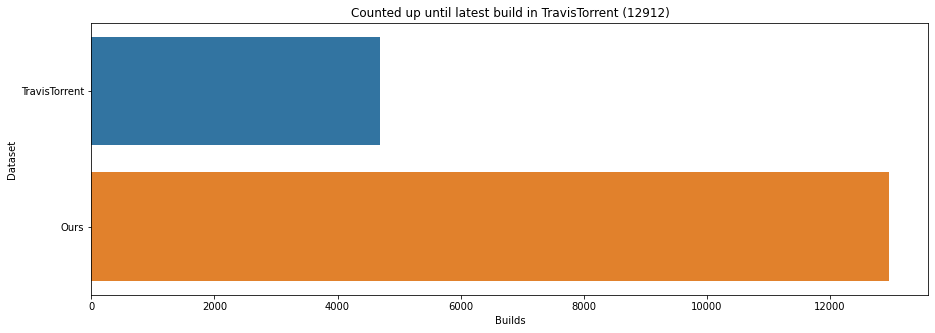

In [93]:
ax = sns.barplot(x="Builds", y="Dataset",
            data=pd.DataFrame([("TravisTorrent", travis_builds),("Ours", ours_builds)],columns=["Dataset", "Builds"]))
ax.set_title(f"Counted up until latest build in TravisTorrent ({project_df.tr_build_number.max()})")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


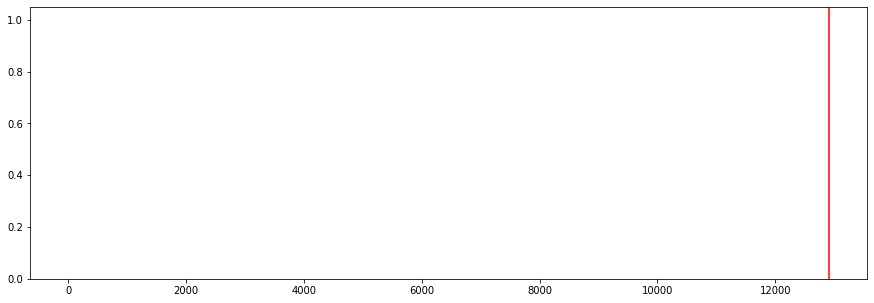

In [94]:
missing_build_numbers = []
build_numbers = allBuilds.number.unique()
for i in range(0, project_df.tr_build_number.max()):
    if i not in build_numbers:
        missing_build_numbers.append(i)
sns.distplot(missing_build_numbers)
plt.axvline(max_build_number, 0, 10, color="r")

**TravisTorrent has 1 job_id per row**

In [96]:
len(project_df) == len(project_df.tr_job_id.unique())

True

**Number of job ids up until the last build number in TraviTorrent**

TravisTorrent

In [97]:
travis_jobs = len(project_df.tr_job_id.unique())

Our dataset

In [98]:
ids = list(allBuilds[allBuilds.number < project_df.tr_build_number.max()].id)
ours_jobs = len(jobsDf[jobsDf.build_id.isin(ids)])

Text(0.5, 1.0, 'Counted up until latest build in TravisTorrent (12912)')

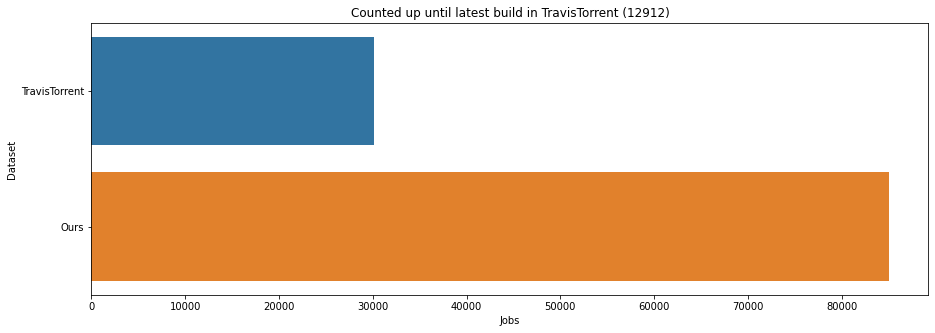

In [99]:
ax = sns.barplot(x="Jobs", y="Dataset",
            data=pd.DataFrame([("TravisTorrent", travis_jobs),("Ours", ours_jobs)],columns=["Dataset", "Jobs"]))
ax.set_title(f"Counted up until latest build in TravisTorrent ({project_df.tr_build_number.max()})")

In [100]:
pd.DataFrame([("TravisTorrent", travis_jobs),("Ours", ours_jobs)],columns=["Dataset", "Jobs"])

,Dataset,Jobs
0,TravisTorrent,30142
1,Ours,85003


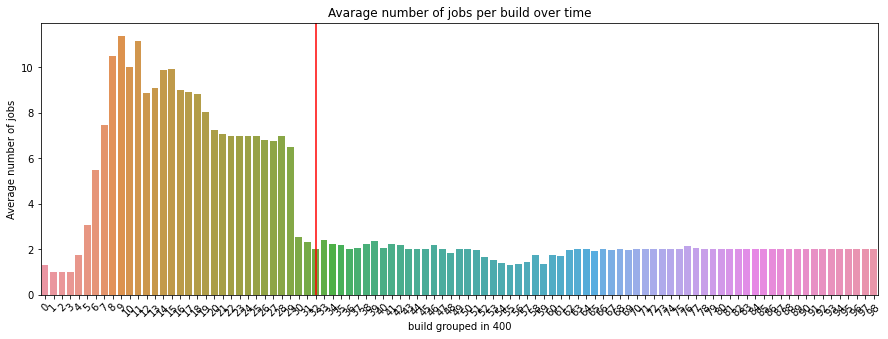

In [101]:
group_size = 400
t = jobsDf.groupby("build_number").count().reset_index()
t["groups"] = t.build_number.apply(lambda x: int(x / group_size))
data=t.groupby("groups").mean().reset_index()
ax = sns.barplot(x="groups",y="job_id",data=data)
ax.tick_params(axis='x', labelrotation= 45)

ax.set_title("Avarage number of jobs per build over time")
ax.set_xlabel("build grouped in 400")
ax.set_ylabel("Average number of jobs")

plt.axvline(int(project_df.tr_build_number.max()/group_size), 0, 10, color="r")

### Look at a couple of builds not included in TravisTorrent

In [102]:
notinTravis = allBuilds[allBuilds.id.isin(set(allBuilds[allBuilds.number < project_df.tr_build_number.max()].id) - set(project_df.tr_build_id))]

In [103]:
notinTravis.sort_values(by="number").head(10)

,number,pull_request_number,id,event_type,finished_at,pull_request_title,started_at,duration,state
9986,9,NaN,54834266,push,2015-03-18T08:21:19Z,None,2015-03-18T08:18:56Z,242.0,failed
9985,10,149.0,54834270,pull_request,2015-03-18T08:21:17Z,SONAR-6236 Migrate existing dashboards to use ...,2015-03-18T08:18:57Z,232.0,failed
9980,15,NaN,54846160,push,2015-03-18T10:18:56Z,None,2015-03-18T10:16:32Z,260.0,failed
9979,16,149.0,54846165,pull_request,2015-03-18T10:18:50Z,SONAR-6236 Migrate existing dashboards to use ...,2015-03-18T10:16:40Z,252.0,failed
9978,17,NaN,54851644,push,2015-03-18T11:00:47Z,None,2015-03-18T10:58:54Z,220.0,failed
9977,18,149.0,54851656,pull_request,2015-03-18T11:01:34Z,SONAR-6236 Migrate existing dashboards to use ...,2015-03-18T10:58:54Z,261.0,failed
9961,34,NaN,54890670,push,2015-03-18T16:03:59Z,None,2015-03-18T15:58:20Z,423.0,failed
9954,41,NaN,55001342,push,2015-03-19T10:21:10Z,None,2015-03-19T10:19:05Z,218.0,failed
9953,42,NaN,55004381,push,2015-03-19T10:49:22Z,None,2015-03-19T10:46:38Z,268.0,failed
9952,43,150.0,55004384,pull_request,2015-03-19T10:48:36Z,Move measures persistence from batch to comput...,2015-03-19T10:46:38Z,213.0,failed


<AxesSubplot:xlabel='state', ylabel='count'>

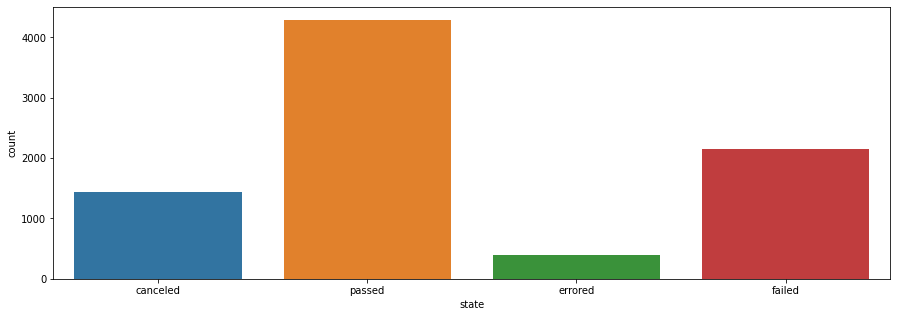

In [104]:
sns.countplot(notinTravis.state)

<AxesSubplot:xlabel='event_type', ylabel='count'>

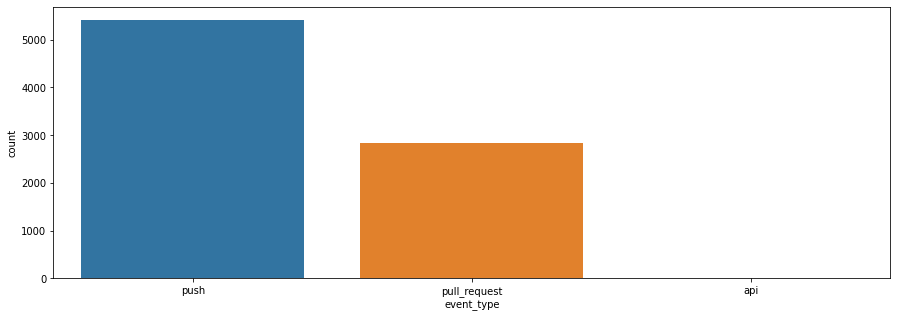

In [105]:
sns.countplot(notinTravis.event_type)

In [106]:
jobsDf.sort_values(by="build_number")

,build_id,build_number,job_id
69117,54731125,1,54731127
69116,54731125,1,54731126
69115,54734500,2,54734502
69114,54734500,2,54734501
69113,54738299,3,54738301
...,...,...,...
126974,730062832,39425,730062833
126973,731079493,39426,731079495
126972,731079493,39426,731079494
126971,731395956,39427,731395958


pp = pprint.PrettyPrinter(depth=6)
current_jobs = []
i = 0
offset=24700
failed = 0
for build_id in allBuilds.sort_values(by="id").id.unique():
    if i < offset:
        i+=1
        continue
    jobs = travis.get_jobs(build_id)
    if not jobs:
        print(f"Failed build {build_id}")
        failed+=1
    else:
        current_jobs = current_jobs + jobs
        i+=1
    if(i % 100 == 0):
        print(f"Downloaded jobs: {i}...")
        with open(f'jobs/jobs{i}.pkl', 'wb') as f:
            pickle.dump(current_jobs, f)
        current_jobs = []  
print(i)